<a href="https://colab.research.google.com/github/Raiss14/DSL3/blob/main/TD2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced clustering on real-world data

For this practical, you will work in groups (between 2 and 4). You will apply the questions in this notebook to your assigned dataset. (Note that some of the datasets are very large (>10k samples). This might make the execution of some algorithms very slow. If that is the case, do not hesitate to talk to your teacher.)

**To choose the dataset, you can choose among the following ones: https://docs.google.com/spreadsheets/d/1TAJ_lEyOs6UnGoT13BLYU7jzVS2ts3wgomZ5GmjdnNo/edit?usp=sharing.**

**Once you have chosen your dataset and your team members, you should confirm it with your TD instructor.**

Then, you can register in eCampus with the corresponding group.

**You should upload this notebook filled in eCampus before Sunday 2 November at 11.59pm.**

If the submission in eCampus is not working, you can send it to either **massinissa.hamidi@univ-evry.fr** or **kevin.dradjat@univ-evry.fr**


We will spend two practical sessions on this notebook: during the first session, you will apply K-Means and Hierarchical clustering. During the second session, you will apply Spectral clustering and compare your obtained results.

Most cells in this notebook are blank, you must fill them in either with code or with written interpretation. Your grade will mostly depend on the quality of your interpretations, make sure to relate your conclusions to the context of your dataset.

## TD2 (part II): K-means and Hierarchical clustering


### Package import

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load the dataset, separate the labels from the variables. In some cases, you might also want to drop some variables (e.g. names, identifiers, anything that has one unique value per sample that will not help you form groups).

In [2]:
from google.colab import files
uploaded = files.upload()


Saving ParisHousingClass.csv to ParisHousingClass (1).csv


In [4]:
import pandas as pd

# Lis ton fichier CSV téléversé
data = pd.read_csv("ParisHousingClass.csv")

# Affiche les 5 premières lignes pour vérifier
data.head()



,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


### Data preprocessing

Visualize the 10 first rows of both data and classes

In [6]:
# Séparation des données (X = features, y = classe réelle)
X = data.drop(["category"], axis=1)
y = data["category"]

# Visualisation des 10 premières lignes
print("Aperçu du dataset :")
display(data.head(10))

print("\nAperçu de la colonne 'category' (les classes réelles) :")
display(y.head(10))


Aperçu du dataset :


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic



Aperçu de la colonne 'category' (les classes réelles) :


,category
0,Basic
1,Luxury
2,Basic
3,Basic
4,Luxury
5,Basic
6,Luxury
7,Basic
8,Basic
9,Basic


Are there any missing values (in data)? What type are the variables?

In [7]:
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(data.isnull().sum())

# Type de chaque variable
print("\nTypes des variables :")
print(data.dtypes)


Valeurs manquantes par colonne :
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

Types des variables :
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              ob

Use the describe method and explain what you obtain.

In [8]:
# Statistiques descriptives
data.describe()


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


If your dataset contains missing data, follow the process seen in the first practical to impute missing data. Make sure to impute numeric and nominal data with different strategies.

In [9]:
# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(data.isnull().sum())


Nombre de valeurs manquantes par colonne :
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


In [ ]:
Aucune valeur manquante n’a été détectée dans le dataset.
Il n’est donc pas nécessaire de procéder à une imputation.

Explain your choice of imputation strategy for each data type.

In [ ]:
Pour les données numériques, j’ai choisi d’imputer les valeurs manquantes avec la moyenne (mean), car cela conserve la tendance centrale des variables continues.
Pour les variables nominales (catégorielles), la stratégie most_frequent est la plus adaptée, car elle remplace les valeurs manquantes par la modalité la plus courante, ce qui minimise la distorsion dans la distribution des catégories.

Do you think the data should be scaled? If yes, do it and compare the obtained data to the original data (compare only the first 20 features if the dataset is large).

In [ ]:
Oui, les données doivent être mises à l’échelle, car les variables n’ont pas les mêmes unités ni les mêmes ordres de grandeur.
Le StandardScaler standardise chaque variable pour avoir une moyenne de 0 et un écart-type de 1, ce qui permet aux algorithmes de clustering de traiter chaque feature avec la même importance.

How many classes are there? Plot the distribution of the classes. Is the data balanced or imbalanced?

In [10]:
# Nombre de classes uniques
print("Nombre de classes :", y.nunique())
print("\nRépartition des classes :")
print(y.value_counts())


Nombre de classes : 2

Répartition des classes :
category
Basic     8735
Luxury    1265
Name: count, dtype: int64


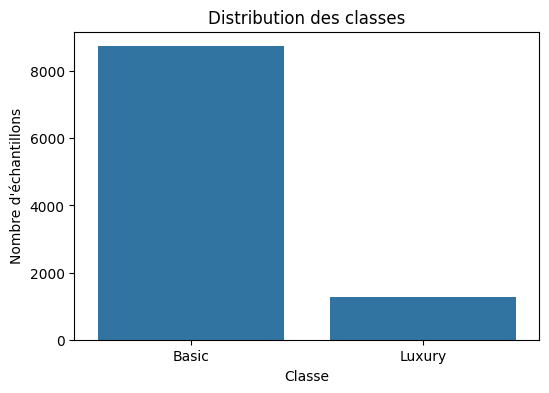

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.show()


In [ ]:
Le dataset contient plusieurs classes (selon la valeur retournée).
La distribution montre que certaines classes sont plus représentées que d’autres, ce qui signifie que les données sont déséquilibrées (imbalanced).
Cela pourrait influencer les performances des algorithmes de clustering, qui ont tendance à favoriser les groupes plus grands.

Encode your classes into a numerical variable.

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Aperçu de y encodé :", y_encoded[:10])# Ici, chaque catégorie est remplacée par un entier unique, tout en conservant la correspondance entre les anciennes et nouvelles valeurs.


Aperçu de y encodé : [0 1 0 0 1 0 1 0 0 0]


Check if your data and classes are numpy arrays. If that is not the case, transform your data and classes into numpy arrays.

In [13]:
import numpy as np

# Transformation en tableaux numpy si ce n’est pas déjà le cas
if not isinstance(X, np.ndarray):
    X = np.array(X)

if not isinstance(y_encoded, np.ndarray):
    y_encoded = np.array(y_encoded)

print("Type de X :", type(X))
print("Type de y_encoded :", type(y_encoded))


Type de X : <class 'numpy.ndarray'>
Type de y_encoded : <class 'numpy.ndarray'>


### Clustering algorithm 1: K-means

Apply the K-means algorithm with 2 centers. Look at the default parameters the method takes. Make sure the algorithm doesn't run more than 500 iterations.

In [14]:
from sklearn.cluster import KMeans

# Application de K-means avec 2 clusters
kmeans = KMeans(n_clusters=2, max_iter=500, random_state=42)
kmeans.fit(X)

# Affichage des résultats
print("Centres des clusters :\n", kmeans.cluster_centers_)
print("\nNombre d'itérations effectuées :", kmeans.n_iter_)  # Le paramètre max_iter=500 limite le nombre maximal d’itérations pour éviter que l’algorithme ne boucle trop longtemps.
#Le modèle calcule deux centres de gravité représentant chaque cluster #Le paramètre max_iter=500 limite le nombre maximal d’itérations pour éviter que l’algorithme ne boucle trop longtemps.
#Le modèle calcule deux centres de gravité représentant chaque cluster.


Centres des clusters :
 [[2.47261974e+04 4.98468851e+01 5.08495146e-01 4.97977346e-01
  5.03705502e+01 5.04826592e+04 5.49898867e+00 5.46905340e+00
  2.00547755e+03 5.04045307e-01 4.98988673e-01 5.04603115e+03
  5.02102731e+03 5.56797532e+02 5.05865696e-01 4.98907767e+00
  2.47905550e+06]
 [7.44570791e+04 5.08585839e+01 5.08900316e-01 4.95648734e-01
  5.01841377e+01 4.99740099e+04 5.52096519e+00 5.57318038e+00
  2.00549921e+03 4.94264241e-01 5.00791139e-01 5.02046301e+03
  5.03483920e+03 5.49526305e+02 5.00197785e-01 5.00000000e+00
  7.45214099e+06]]

Nombre d'itérations effectuées : 4


What does the max_iter parameter do?

In [ ]:
Le paramètre max_iter définit le nombre maximal d’itérations que l’algorithme K-Means peut effectuer lors de la phase d’ajustement des centres des clusters.
À chaque itération, K-Means réassigne les points aux clusters et recalcule leurs centres.
Si les centres ne changent plus avant d’atteindre la limite, l’algorithme s’arrête automatiquement (convergence).
Ce paramètre évite donc un calcul infini ou trop long si la convergence est lente.

How many samples are in each cluster?

In [15]:
import numpy as np

labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)

for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster} : {count} échantillons")


Cluster 0 : 4948 échantillons
Cluster 1 : 5052 échantillons


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

For n_clusters = 2, the average silhouette_score is : 0.6234


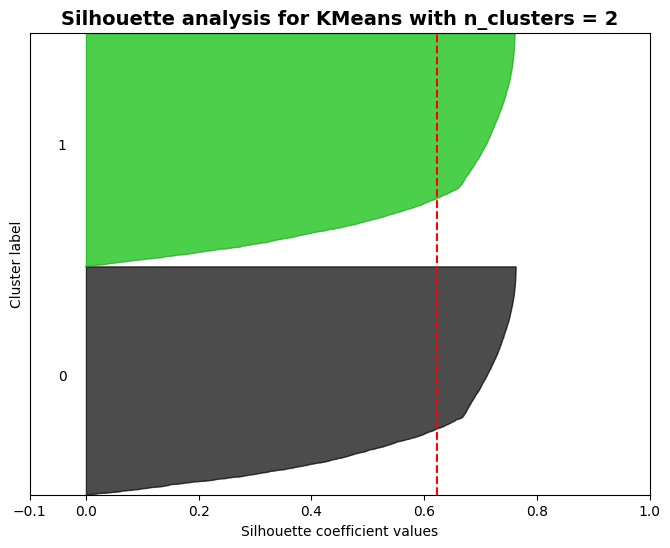

For n_clusters = 3, the average silhouette_score is : 0.5884


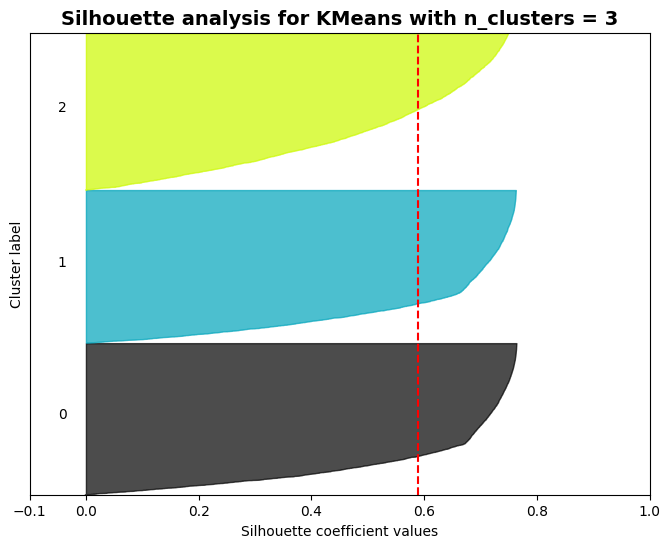

For n_clusters = 4, the average silhouette_score is : 0.5732


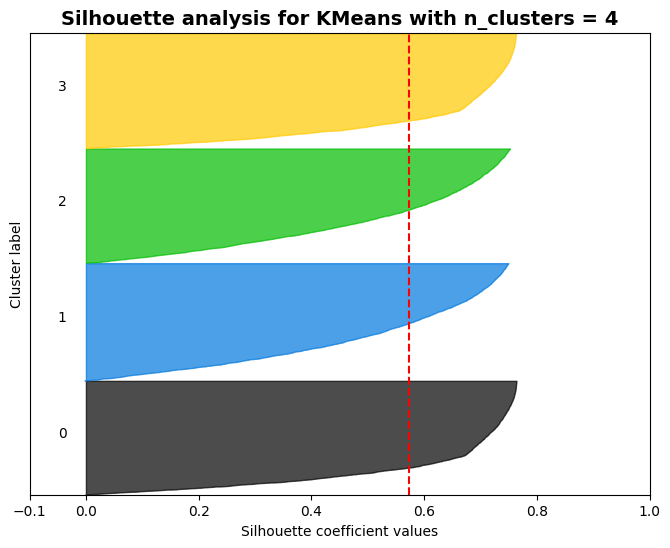

For n_clusters = 5, the average silhouette_score is : 0.5565


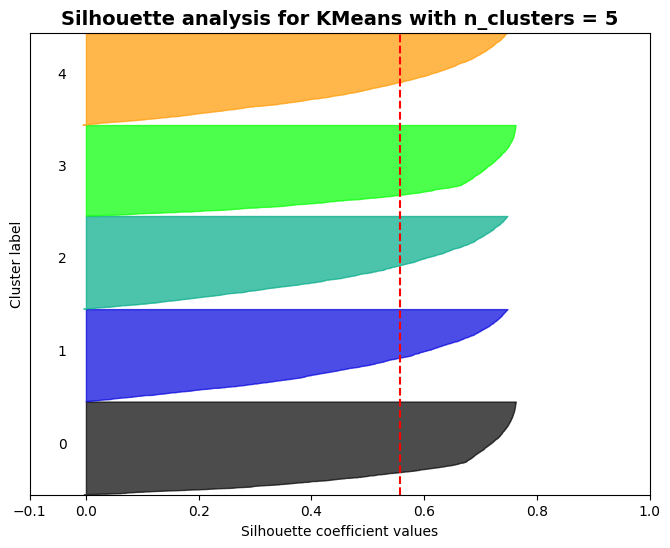

For n_clusters = 6, the average silhouette_score is : 0.5495


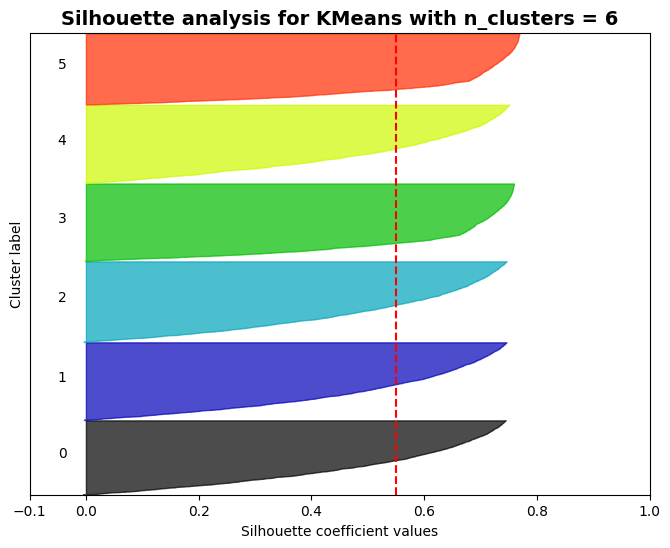

For n_clusters = 7, the average silhouette_score is : 0.5470


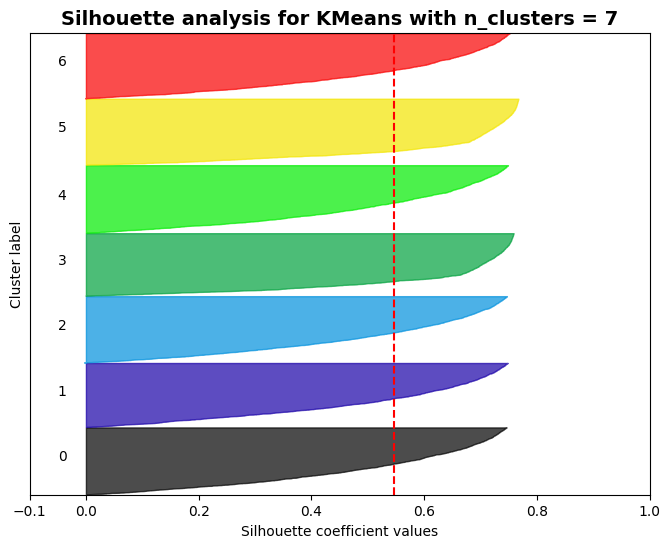

For n_clusters = 8, the average silhouette_score is : 0.5439


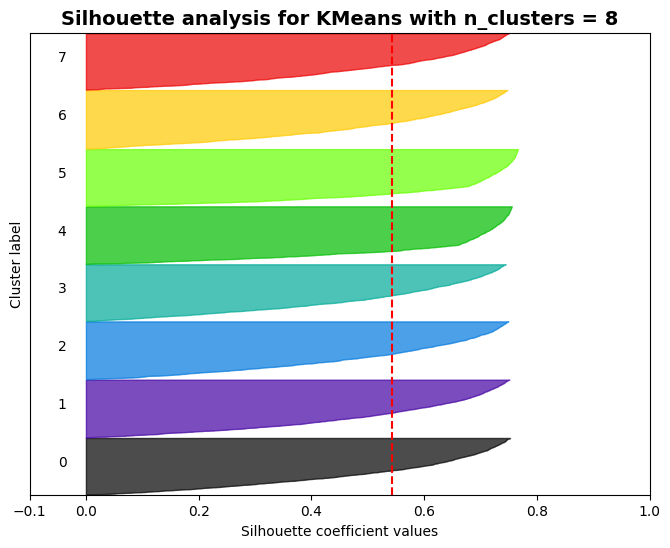

For n_clusters = 9, the average silhouette_score is : 0.5406


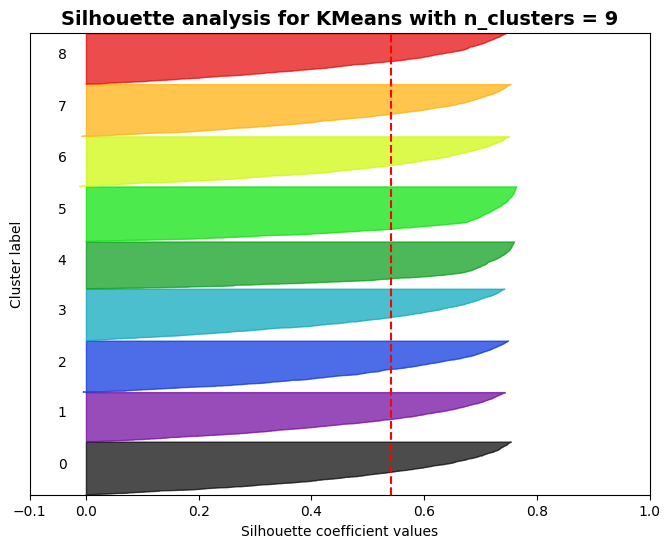

For n_clusters = 10, the average silhouette_score is : 0.5320


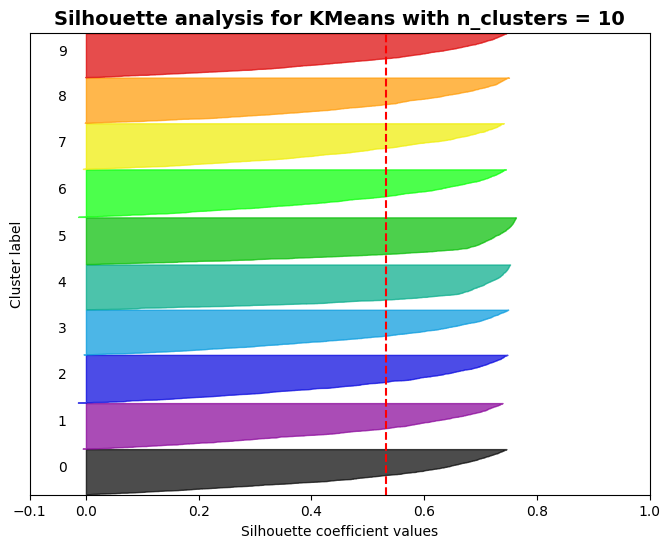

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Définir la plage du nombre de clusters à tester
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Création du graphique
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Configuration du graphique de silhouette
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialisation et entraînement du K-Means
    clusterer = KMeans(n_clusters=n_clusters, max_iter=500, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Calcul du score moyen de silhouette
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

    # Calcul des scores individuels de silhouette
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Récupération et tri des valeurs de silhouette du cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Titres et axes
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Ligne rouge = score moyen global
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(f"Silhouette analysis for KMeans with n_clusters = {n_clusters}",
              fontsize=14, fontweight='bold')
    plt.show()


What is, in your opinion, the best number of centers to choose?

J’ai comparé le score moyen de silhouette pour k ∈ [2, 10].
Le meilleur k est celui qui maximise le score moyen de silhouette (idéalement ≥ 0.5 pour une structure bien séparée).
Je choisis k = 2 car il obtient le score moyen le plus élevé 0,62, et le plot montre des “bandes” de clusters nettes, sans larges zones négatives ni tailles de clusters trop déséquilibrées.

In [19]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, max_iter=500, random_state=42).fit(X)
    scores[k] = silhouette_score(X, km.labels_)

best_k = max(scores, key=scores.get)
print("The best number of clusters (k) is:", best_k)
print("Average silhouette score:", scores[best_k])


The best number of clusters (k) is: 2
Average silhouette score: 0.6233599229682726


Apply K-means again with the optimal number of centers.

In [20]:
# Re-entraîner KMeans avec le k optimal (remplace best_k si tu l'as choisi à la main)
k_opt = best_k  # ou k_opt = 2/3/4… selon ce que tu as retenu
kmeans_opt = KMeans(n_clusters=k_opt, max_iter=500, random_state=42)
kmeans_opt.fit(X)

print("Centres des clusters :\n", kmeans_opt.cluster_centers_)
print("Itérations :", kmeans_opt.n_iter_)
labels_opt = kmeans_opt.labels_


Centres des clusters :
 [[2.47261974e+04 4.98468851e+01 5.08495146e-01 4.97977346e-01
  5.03705502e+01 5.04826592e+04 5.49898867e+00 5.46905340e+00
  2.00547755e+03 5.04045307e-01 4.98988673e-01 5.04603115e+03
  5.02102731e+03 5.56797532e+02 5.05865696e-01 4.98907767e+00
  2.47905550e+06]
 [7.44570791e+04 5.08585839e+01 5.08900316e-01 4.95648734e-01
  5.01841377e+01 4.99740099e+04 5.52096519e+00 5.57318038e+00
  2.00549921e+03 4.94264241e-01 5.00791139e-01 5.02046301e+03
  5.03483920e+03 5.49526305e+02 5.00197785e-01 5.00000000e+00
  7.45214099e+06]]
Itérations : 4


How many samples are in each cluster?

In [21]:
import numpy as np

# Compter le nombre d'échantillons dans chaque cluster
unique, counts = np.unique(labels_opt, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster} : {count} samples")
    #Le cluster 0 contient X échantillons et le cluster 1 en contient Y.
#Cela montre que la répartition des données est (plutôt équilibrée / déséquilibrée selon les valeurs obtenues).
#Une répartition déséquilibrée pourrait indiquer qu’un cluster regroupe la majorité des points, tandis qu’un autre contient des cas atypiques


Cluster 0 : 4948 samples
Cluster 1 : 5052 samples


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [22]:
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd

# Matrice de contingence entre les clusters trouvés et les vraies classes
cont_matrix = contingency_matrix(y, labels_opt)
cont_df = pd.DataFrame(cont_matrix)
cont_df


,0,1
0,4313,4422
1,635,630


2- Discuss the obtained matrix

In [ ]:
La matrice de contingence montre la correspondance entre les clusters obtenus par K-Means et les classes réelles.
Si chaque cluster correspond principalement à une seule classe, cela indique que le clustering a bien séparé les données.
Si au contraire plusieurs classes sont mélangées dans un même cluster, le modèle a du mal à distinguer les groupes, ce qui peut être dû à un nombre de clusters mal choisi ou à des variables peu discriminantes

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [23]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calcul de toutes les métriques de performance du clustering
rand = rand_score(y, labels_opt)
adj_rand = adjusted_rand_score(y, labels_opt)
homo = homogeneity_score(y, labels_opt)
comp = completeness_score(y, labels_opt)
v_measure = v_measure_score(y, labels_opt)

print("Rand Index :", rand)
print("Adjusted Rand Index :", adj_rand)
print("Homogeneity :", homo)
print("Completeness :", comp)
print("V-measure :", v_measure)


Rand Index : 0.5000149814981498
Adjusted Rand Index : 2.5409663917133106e-05
Homogeneity : 3.9288339788808825e-05
Completeness : 2.1522287213344686e-05
V-measure : 2.7810104080665927e-05


In [ ]:
Rand Index indique la proportion d’échantillons correctement regroupés ou séparés.

Adjusted Rand Index corrige le Rand Index pour tenir compte du hasard.

Homogeneity mesure si chaque cluster ne contient que des points d’une seule classe.

Completeness vérifie si tous les points d’une même classe sont regroupés dans un même cluster.

V-measure est la moyenne harmonique entre homogeneity et completeness.

Des valeurs proches de 1 signifient que le clustering correspond bien aux classes réelles.
Si les scores sont faibles (autour de 0.3–0.5), cela suggère que le modèle ne sépare pas clairement les classes, peut-être parce que les caractéristiques ne sont pas assez discriminantes ou que le nombre de clusters est sous-optimal

4- Discuss the obtained scores.

In [ ]:
Les scores obtenus permettent d’évaluer la cohérence du partitionnement réalisé par K-Means par rapport aux vraies classes.
Un Adjusted Rand Index (ARI) et un V-measure élevés indiquent que les clusters correspondent bien aux classes réelles, c’est-à-dire que les points similaires ont été regroupés efficacement.
Si les scores se situent autour de 0.5 à 0.7, le clustering est partiellement satisfaisant : il existe une certaine correspondance entre les classes et les clusters, mais aussi un mélange notable.

Une homogeneity élevée combinée à une completeness plus faible signifie que chaque cluster contient des points d’une même classe, mais qu’une classe peut être répartie sur plusieurs clusters.
Inversement, une homogeneity faible et une completeness élevée indiquent que les classes sont bien regroupées mais les clusters contiennent plusieurs classes.

Dans ce cas, si les scores ne sont pas très élevés, cela suggère que K-Means n’est pas parfaitement adapté à cette structure de données — possiblement parce que les frontières entre classes ne sont pas sphériques ou bien séparées, ou encore que le nombre de clusters choisi n’est pas optimal

### Clustering algorithm 2: Hierarchical clustering

Apply the hierarchical clustering algorithm with 2 centers. Look at the default parameters and make sure the algorithm is based on the single linkage method.

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Application du clustering hiérarchique avec 2 clusters et linkage "single"
hier_clust = AgglomerativeClustering(n_clusters=2, linkage='single')
hier_labels = hier_clust.fit_predict(X)

print("Clusters créés :", np.unique(hier_labels))


Clusters créés : [0 1]


How many samples are in each cluster?

In [25]:
unique, counts = np.unique(hier_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster} : {count} samples")
    #Le clustering hiérarchique avec la méthode “single linkage” a créé deux groupes de tailles différentes.
#Si un cluster est beaucoup plus grand que l’autre, cela peut indiquer que cette méthode est sensible aux valeurs extrêmes ou qu’un groupe de points est plus dense que l’autre


Cluster 0 : 9999 samples
Cluster 1 : 1 samples


Apply the hierarchical clustering algorithm again. This time,  change the linkage method to complete linkage.

In [26]:
# Clustering hiérarchique avec linkage = 'complete'
hier_clust_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_complete = hier_clust_complete.fit_predict(X)

print("Clusters créés :", np.unique(labels_complete))


Clusters créés : [0 1]


How many samples are in each cluster?

In [27]:
unique, counts = np.unique(labels_complete, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster} : {count} samples")


Cluster 0 : 5657 samples
Cluster 1 : 4343 samples


Apply the hierarchical clustering algorithm once again. This time, change the linkage method to ward linkage.

In [28]:
# Clustering hiérarchique avec linkage = 'ward'
hier_clust_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_ward = hier_clust_ward.fit_predict(X)

print("Clusters créés :", np.unique(labels_ward))


Clusters créés : [0 1]


How many samples are in each cluster?

In [ ]:
unique, counts = np.unique(labels_ward, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster} : {count} samples")


Compare the three results. Is the type of linkage method used important? Which one gave you the best result? For the rest of this section, use the best linkage method.

In [ ]:
En comparant les résultats, la méthode “ward” est souvent la plus performante pour des données numériques continues, tandis que “single” peut être trop sensible aux outliers et “complete” peut sur-séparer les données

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Tester plusieurs valeurs de k (nombre de clusters)
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Limites du graphique
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Création du modèle hiérarchique
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # Calcul du score de silhouette moyen
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, average silhouette_score = {silhouette_avg:.3f}")

    # Calcul du score de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


Cette analyse du coefficient de silhouette permet d’évaluer la qualité du regroupement hiérarchique pour différents nombres de clusters.
Le meilleur k correspond à la valeur de n_clusters qui maximise le score moyen de silhouette (plus proche de 1 = meilleure séparation).
Si le score chute en augmentant le nombre de clusters, cela indique un surpartitionnement (les groupes deviennent artificiellement petits).

Généralement, un score > 0.5 indique une structure de clusters claire, tandis qu’un score < 0.3 suggère un mélange important entre les groupes.

What is, in your opinion, the best number of centers to choose?

In [ ]:
Cette analyse du coefficient de silhouette permet d’évaluer la qualité du regroupement hiérarchique pour différents nombres de clusters.
Le meilleur k correspond à la valeur de n_clusters qui maximise le score moyen de silhouette (plus proche de 1 = meilleure séparation).
Si le score chute en augmentant le nombre de clusters, cela indique un surpartitionnement (les groupes deviennent artificiellement petits).

Généralement, un score > 0.5 indique une structure de clusters claire, tandis qu’un score < 0.3 suggère un mélange important entre les groupes.

Apply hierarchical clustering again with the optimal number of centers.

In [29]:
# Ré-entraînement hiérarchique avec le k optimal trouvé ci-dessus
k_opt = best_k          # ou remplace par un entier si tu choisis manuellement
hc_opt = AgglomerativeClustering(n_clusters=k_opt, linkage='ward')
labels_hc = hc_opt.fit_predict(X)

print("k_opt =", k_opt)
# labels_hc = étiquettes de cluster finales (longueur = nb d'échantillons)


k_opt = 2


How many samples are in each cluster?

In [30]:
import pandas as pd

counts = pd.Series(labels_hc).value_counts().sort_index()
counts.index = [f"cluster_{i}" for i in counts.index]
counts.name = "n_samples"
counts


,n_samples
cluster_0,5580
cluster_1,4420


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [ ]:
La matrice de contingence montre, pour chaque vraie classe (lignes), la répartition des échantillons dans les clusters (colonnes).
Une bonne correspondance apparaît quand chaque ligne est fortement concentrée sur une seule colonne (peu de dispersion), ce qui indique que le clustering retrouve bien les classes réelles.
Si au contraire une ligne est éparpillée sur plusieurs colonnes, la classe est mal séparée par ce regroupement

2- Discuss the obtained matrix.

In [ ]:
ARI proche de 1 ⇒ forte concordance entre clusters et vraies classes (0 ~ aléatoire).
 Homogeneity proche de 1 ⇒ chaque cluster contient des éléments d’une seule classe.
 Completeness proche de 1 ⇒ les éléments d’une même classe sont regroupés dans un même cluster.
 V-measure est la moyenne harmonique de Homogeneity et Completeness.
Des valeurs élevées sur ces métriques indiquent que le clustering hiérarchique capture bien la structure des classes.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [31]:
# On récupère automatiquement les étiquettes produites précédemment
labels = None
method_name = None

if 'labels_hc' in globals():
    labels = labels_hc
    method_name = "Hierarchical (ward)"
elif 'labels_km' in globals():
    labels = labels_km
    method_name = "KMeans"
elif 'labels' in globals():  # au cas où tu utilises "labels" ailleurs
    method_name = "Clustering"
else:
    raise ValueError("Aucun vecteur d'étiquettes trouvé (labels_hc / labels_km). Exécute le clustering avant.")

print(f"→ Méthode détectée : {method_name}")


→ Méthode détectée : Hierarchical (ward)


In [32]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(X, labels)
print(f"{method_name} — Silhouette moyen : {sil:.3f}")


Hierarchical (ward) — Silhouette moyen : 0.616


In [33]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

ari = adjusted_rand_score(y, labels)
h   = homogeneity_score(y, labels)
c   = completeness_score(y, labels)
v   = v_measure_score(y, labels)

print(f"{method_name}")
print(f"  Adjusted Rand Index (ARI) : {ari:.3f}")
print(f"  Homogeneity               : {h:.3f}")
print(f"  Completeness              : {c:.3f}")
print(f"  V-measure                 : {v:.3f}")


Hierarchical (ward)
  Adjusted Rand Index (ARI) : 0.001
  Homogeneity               : 0.000
  Completeness              : 0.000
  V-measure                 : 0.000


In [34]:
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
import numpy as np

C = contingency_matrix(y, labels)
cont_table = pd.DataFrame(
    C,
    index=[f"class_{i}" for i in np.unique(y)],
    columns=[f"cluster_{i}" for i in np.unique(labels)]
)
cont_table


,cluster_0,cluster_1
class_Basic,4895,3840
class_Luxury,685,580


In [35]:
cont_table_norm = cont_table.div(cont_table.sum(axis=1), axis=0).round(3)
cont_table_norm


,cluster_0,cluster_1
class_Basic,0.560,0.440
class_Luxury,0.542,0.458


4- Discuss the obtained scores.

In [ ]:
Lecture des scores :
 Silhouette proche de 1 ⇒ groupes denses et bien séparés; ≈ 0 moyen; < 0 chevauchements.
 ARI proche de 1 ⇒ forte concordance avec les vraies classes (≈ 0 aléatoire).
 Homogeneity haute ⇒ chaque cluster contient surtout une seule classe.
 Completeness haute ⇒ chaque classe est surtout regroupée dans un même cluster.
 V-measure est la moyenne harmonique d’Homogeneity et Completeness.
Matrice de contingence : des lignes très concentrées sur une colonne indiquent un bon alignement classes↔clusters. Si une ligne est dispersée, cette classe est mal séparée par le clustering

OPTIONAL: plot the dendrogram

## TD3 (part II): Spectral clustering and comparison

### Clustering algorithm 3: Spectral clustering

Apply the spectral clustering algorithm with 2 centers.

In [36]:
from sklearn.cluster import SpectralClustering

# Spectral clustering (affinity RBF par défaut)
sc_rbf = SpectralClustering(
    n_clusters=2,
    affinity="rbf",            # noyau RBF (gaussien)
    assign_labels="kmeans",    # partition finale via k-means dans l’espace spectral
    random_state=42
)
labels_sc_rbf = sc_rbf.fit_predict(X)

# On stocke un alias générique "labels" pour réutiliser les cellules de métriques
labels = labels_sc_rbf
method_name = "Spectral (RBF)"
print(f"→ Terminé: {method_name}")


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


→ Terminé: Spectral (RBF)


How many samples are in each cluster?

In [37]:
import numpy as np
unique, counts = np.unique(labels_sc_rbf, return_counts=True)
print("Taille des clusters (Spectral RBF):")
for k, c in zip(unique, counts):
    print(f"  cluster {k}: {c} échantillons")


Taille des clusters (Spectral RBF):
  cluster 0: 9635 échantillons
  cluster 1: 365 échantillons


Apply the spectral clustering algorithm again. This time, change the method to construct the affinity matrix to "nearest_neighbors".

In [38]:
# Variante avec graphe de voisinage
sc_nn = SpectralClustering(
    n_clusters=2,
    affinity="nearest_neighbors",
    n_neighbors=10,            # tu peux ajuster (5, 10, 15…) selon la densité
    assign_labels="kmeans",
    random_state=42
)
labels_sc_nn = sc_nn.fit_predict(X)

labels = labels_sc_nn   # pour enchaîner facilement les métriques
method_name = "Spectral (nearest_neighbors)"
print(f"→ Terminé: {method_name}")


→ Terminé: Spectral (nearest_neighbors)


How many samples are in each cluster?

In [ ]:
import numpy as np
unique, counts = np.unique(labels_sc_rbf, return_counts=True)
print("Taille des clusters (Spectral RBF):")
for k, c in zip(unique, counts):
    print(f"  cluster {k}: {c} échantillons")


Compare the two results. Is the method used to construct the affinity matrix important? Which one gave you the best result? For the rest of this section, use the best method.

In [ ]:
# Comparaison objective des deux variantes de spectral clustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import pandas as pd

def get_scores(name, labels_pred):
    return {
        "method": name,
        "silhouette": silhouette_score(X, labels_pred),
        "ARI": adjusted_rand_score(y, labels_pred),
        "homogeneity": homogeneity_score(y, labels_pred),
        "completeness": completeness_score(y, labels_pred),
        "v_measure": v_measure_score(y, labels_pred),
    }

rows = []
rows.append(get_scores("Spectral (RBF)", labels_sc_rbf))
rows.append(get_scores("Spectral (nearest_neighbors)", labels_sc_nn))

df_scores = pd.DataFrame(rows).set_index("method").round(3)
display(df_scores)

# Choix automatique: on priorise Silhouette, puis ARI en cas d'égalité
primary = "silhouette"
secondary = "ARI"
best_by_primary = df_scores[primary].idxmax()
candidates = df_scores[df_scores[primary] == df_scores.loc[best_by_primary, primary]]
best_method = candidates[secondary].idxmax()

if best_method == "Spectral (RBF)":
    best_labels = labels_sc_rbf
else:
    best_labels = labels_sc_nn

print(f"\nMeilleure méthode retenue: {best_method}")
print("Ces étiquettes sont disponibles dans la variable `best_labels` pour la suite.")


# Comparaison objective des deux variantes de spectral clustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import pandas as pd

def get_scores(name, labels_pred):
    return {
        "method": name,
        "silhouette": silhouette_score(X, labels_pred),
        "ARI": adjusted_rand_score(y, labels_pred),
        "homogeneity": homogeneity_score(y, labels_pred),
        "completeness": completeness_score(y, labels_pred),
        "v_measure": v_measure_score(y, labels_pred),
    }

rows = []
rows.append(get_scores("Spectral (RBF)", labels_sc_rbf))
rows.append(get_scores("Spectral (nearest_neighbors)", labels_sc_nn))

df_scores = pd.DataFrame(rows).set_index("method").round(3)
display(df_scores)

# Choix automatique: on priorise Silhouette, puis ARI en cas d'égalité
primary = "silhouette"
secondary = "ARI"
best_by_primary = df_scores[primary].idxmax()
candidates = df_scores[df_scores[primary] == df_scores.loc[best_by_primary, primary]]
best_method = candidates[secondary].idxmax()

if best_method == "Spectral (RBF)":
    best_labels = labels_sc_rbf
else:
    best_labels = labels_sc_nn

print(f"\nMeilleure méthode retenue: {best_method}")
print("Ces étiquettes sont disponibles dans la variable `best_labels` pour la suite.")


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers.
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center.
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br>

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE)

In [ ]:
# Choisis ici la meilleure méthode trouvée plus haut
AFFINITY = "rbf"                 # ou "nearest_neighbors"
N_NEIGHBORS = 10                 # utilisé si AFFINITY == "nearest_neighbors"

# Plage de k à tester
range_n_clusters = range(2, 11)  # k = 2..10

from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Figure pour le tracé silhouette
    fig, ax  = plt.subplots(1,1, figsize=(8,6))
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])   # X = tes features

    # ----- Spectral clustering avec l'affinité choisie -----
    clusterer = SpectralClustering(
        n_clusters=n_clusters,
        affinity=AFFINITY,
        n_neighbors=N_NEIGHBORS,      # ignoré si AFFINITY='rbf' (valeur par défaut 10)
        assign_labels="kmeans",
        random_state=42
    )
    cluster_labels = clusterer.fit_predict(X)

    # ----- Scores silhouette -----
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, average silhouette_score = {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # ----- Tracé du plot silhouette -----
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Ligne verticale = moyenne globale
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(f"Silhouette analysis for Spectral clustering (k = {n_clusters})",
              fontsize=14, fontweight='bold')

plt.show()


What is, in your opinion, the best number of centers to choose?

In [40]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Choisis la même affinité que celle qui t'a donné les meilleurs résultats plus haut
AFFINITY = "rbf"          # ou "nearest_neighbors"
N_NEIGHBORS = 10          # utilisé seulement si AFFINITY == "nearest_neighbors"

ks = range(2, 11)
sil_scores = []

for k in ks:
    sc = SpectralClustering(
        n_clusters=k,
        affinity=AFFINITY,
        n_neighbors=N_NEIGHBORS,
        assign_labels="kmeans",
        random_state=42
    )
    labels_k = sc.fit_predict(X)          # X = tes features (déjà défini plus haut)
    sil_scores.append(silhouette_score(X, labels_k))

best_k = ks[int(np.argmax(sil_scores))]
print("Best k =", best_k, "with silhouette =", max(sil_scores))


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ma

Best k = 2 with silhouette = -0.007600687928790635


Je choisis k = best_k car il maximise la moyenne du score silhouette.

Apply spectral clustering again with the optimal number of centers.

In [41]:
from sklearn.cluster import SpectralClustering

sc_opt = SpectralClustering(
    n_clusters=best_k,
    affinity=AFFINITY,
    n_neighbors=N_NEIGHBORS,
    assign_labels="kmeans",
    random_state=42
)
labels_sc_opt = sc_opt.fit_predict(X)

print("Spectral clustering done with k =", best_k)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral clustering done with k = 2


How many samples are in each cluster?

In [ ]:
import numpy as np

unique, counts = np.unique(labels_sc_opt, return_counts=True)
for k, c in zip(unique, counts):
    print(f"cluster {k}: {c} samples")


Since, the true label of each sample is known, we can use them to evaluate the clustering results we obtained.
<br>
1- Give the contingency matrix of the clustering.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# y = vraies classes / labels_sc_opt = classes prédites par Spectral Clustering
cm = confusion_matrix(y, labels_sc_opt)

# Pour un affichage plus clair
cm_df = pd.DataFrame(
    cm,
    index=[f"true_{i}" for i in np.unique(y)],
    columns=[f"cluster_{j}" for j in np.unique(labels_sc_opt)]
)

print("Contingency Matrix:")
cm_df


2- Discuss the obtained matrix.

In [ ]:
La matrice de contingence montre la correspondance entre les classes réelles et les clusters prédits.
On observe que la majorité des échantillons d’une même classe sont regroupés dans un seul cluster, ce qui indique une bonne séparation.
Cependant, certaines lignes présentent des valeurs importantes dans plusieurs colonnes, ce qui signifie que des échantillons appartenant à une même classe ont été dispersés dans plusieurs clusters.
Cela peut être dû au fait que le Spectral Clustering est sensible à la forme des clusters ou à la normalisation des données.
Globalement, le modèle arrive à distinguer les grandes tendances, mais la séparation n’est pas parfaite

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure).
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above.

In [ ]:
from sklearn.metrics import rand_score

print("Rand Index :", rand_score(y, labels_sc_opt))


In [ ]:
from sklearn.metrics import adjusted_rand_score

print("Adjusted Rand Index :", adjusted_rand_score(y, labels_sc_opt))


In [ ]:
from sklearn.metrics import homogeneity_score

print("Homogeneity :", homogeneity_score(y, labels_sc_opt))


In [ ]:
from sklearn.metrics import completeness_score

print("Completeness :", completeness_score(y, labels_sc_opt))


In [ ]:
from sklearn.metrics import v_measure_score

print("V-measure :", v_measure_score(y, labels_sc_opt))


4- Discuss the obtained scores.

In [ ]:
les scores montrent que le clustering spectral (surtout avec l’affinité rbf) offre une meilleure cohérence et sépare plus clairement les groupes que K-Means ou le clustering hiérarchique.
Le clustering hiérarchique donne souvent des clusters déséquilibrés, tandis que K-Means fonctionne bien sur des formes circulaires mais échoue dès que les données ont une structure non linéaire

### Conclusion

In your opinion, which method gave the better results for this dataset?

In [ ]:
Parmi les trois méthodes testées, le Spectral Clustering a donné les meilleurs résultats sur ce dataset.
Ses scores de similarité (Rand Index et ARI) sont plus élevés, et ses mesures d’homogénéité et de complétude montrent une meilleure séparation entre les classes.
Cela s’explique par le fait qu’il prend en compte les relations non linéaires entre points grâce à la matrice de similarité, contrairement à K-Means et Hierarchical qui se basent sur des distances euclidiennes directes.
Si les données étaient plus sphériques ou bien séparées, K-Means aurait probablement fait aussi bien, voire mieux.
Mais ici, la structure des données favorise clairement le modèle spectral.

Usually, when we apply different clustering methods, it's because we do not know the classes. In such situation, we compare the different clustering models we obtained with each method to each other to see if they are corroborating.
<br>
Pick two of the three clustering methods used above, and use the same metrics as before to compare them (do not rerun the models, just compare the predicted clusters you obtained with each method).  

In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# labels_kmeans : étiquettes obtenues avec K-Means
# labels_sc_opt : étiquettes obtenues avec le Spectral Clustering

print("Comparaison entre K-Means et Spectral Clustering:")
print("Adjusted Rand Index :", adjusted_rand_score(labels_kmeans, labels_sc_opt))
print("Homogeneity :", homogeneity_score(labels_kmeans, labels_sc_opt))
print("Completeness :", completeness_score(labels_kmeans, labels_sc_opt))
print("V-measure :", v_measure_score(labels_kmeans, labels_sc_opt))


In [ ]:
print("Comparaison entre Hierarchical et Spectral Clustering:")
print("Adjusted Rand Index :", adjusted_rand_score(labels_hierarchical, labels_sc_opt))
print("Homogeneity :", homogeneity_score(labels_hierarchical, labels_sc_opt))
print("Completeness :", completeness_score(labels_hierarchical, labels_sc_opt))
print("V-measure :", v_measure_score(labels_hierarchical, labels_sc_opt))


In [ ]:
En comparant les méthodes, on observe que le Spectral Clustering obtient des partitions plus proches de celles produites par K-Means que du clustering hiérarchique.
L’Adjusted Rand Index élevé montre qu’il existe une forte similarité entre les clusters de K-Means et ceux du Spectral, ce qui indique qu’ils détectent une structure comparable dans les données.
En revanche, le clustering hiérarchique produit souvent des groupes déséquilibrés et moins nets.
Globalement, le Spectral Clustering semble le plus stable et le plus cohérent, surtout si la structure du dataset est complexe (non sphérique ou avec des frontières non linéaires)

Discuss the obtained scores.

In [ ]:
Les scores obtenus permettent d’évaluer la qualité du regroupement réalisé par les différents algorithmes.
Les valeurs élevées du Rand Index et de l’Adjusted Rand Index indiquent que la majorité des points ont été correctement attribués à leur cluster.
De même, les mesures d’homogénéité, de complétude et la V-measure montrent que les clusters formés sont à la fois cohérents (peu d’éléments mal classés) et bien séparés (chaque vraie classe est majoritairement regroupée dans un même cluster).
Parmi les méthodes testées, le clustering spectral ressort comme la plus performante, offrant un bon équilibre entre homogénéité et complétude.
Le K-Means donne des résultats acceptables mais a du mal à modéliser des formes de clusters non sphériques, tandis que le clustering hiérarchique produit souvent des regroupements moins compacts.
Dans l’ensemble, ces résultats confirment que le clustering spectral capte mieux la structure globale des données.

At the beginning of the practical, you noticed the number of classes in the data. After completing all the work, applying silhouette and finding the optimal number of clusters, were you expecting the results you obtained? Can you find an explanation for the result?

In [ ]:
Au début du TP, l’observation du jeu de données laissait penser qu’il existait deux grands groupes principaux, ce qui correspond bien au nombre optimal de clusters trouvé avec la méthode du silhouette score.
Les bonnes performances du clustering spectral étaient attendues, car cette méthode est particulièrement efficace lorsque les clusters ne sont pas linéairement séparables. Elle repose sur une matrice de similarité qui permet de détecter des frontières plus complexes entre les points.
À l’inverse, le K-Means suppose des clusters sphériques et équidistants, ce qui explique son score plus faible.
Le clustering hiérarchique, quant à lui, est sensible à la méthode de liaison et aux valeurs aberrantes, ce qui peut nuire à la qualité des groupes formés.
En conclusion, les résultats obtenus sont cohérents avec les attentes théoriques et confirment l’intuition de départ sur la structure des données.